In [9]:
import pandas as pd

filename = '../missing_mse_list_-1.0.csv'
df = pd.read_csv(filename, delimiter='\t', header=None)
df.to_csv('../data/missing_mse_list_-1.0.csv', sep=',', index=False, header=False)

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("../data/missing_parameter.csv")

def reduce_to_fixed_grid(data):
    reduced_data = []

    contrasts = data['contrast'].unique()

    for contrast in contrasts:
        subset = data[data['contrast'] == contrast]

        min_alpha, max_alpha = subset['α'].min(), subset['α'].max()
        min_lambda, max_lambda = subset['λ'].min(), subset['λ'].max()

        alpha_grid = np.linspace(min_alpha, max_alpha, 10)
        lambda_grid = np.linspace(min_lambda, max_lambda, 10)

        for α in alpha_grid:
            for λ in lambda_grid:
                reduced_data.append({'λ': λ, 'α': α, 'contrast': contrast})

    return pd.DataFrame(reduced_data)

reduced_df = reduce_to_fixed_grid(df)

reduced_df.to_csv("../data/reduced_missing_parameter.csv", index=False)

print("Les données réduites ont été sauvegardées dans 'reduced_missing_parameter.csv'")


Les données réduites ont été sauvegardées dans 'reduced_missing_parameter.csv'


In [ ]:
import pandas as pd
import numpy as np

data_file = '../refined_mse_list.csv'
df = pd.read_csv(data_file)

df['λ'] = df['λ'].astype(float)
df['α'] = df['α'].astype(float)
df['contrast'] = df['contrast'].astype(float)

lambda_values = sorted(df['λ'].unique())
alpha_values = sorted(df['α'].unique())
full_grid = pd.DataFrame([(l, a) for l in lambda_values for a in alpha_values], columns=['λ', 'α'])

missing_parameters = []

for contrast in df['contrast'].unique():
    df_contrast = df[df['contrast'] == contrast][['λ', 'α']]
    
    # Perform an outer join to find missing (λ, α) pairs
    contrast_grid = full_grid.merge(df_contrast, on=['λ', 'α'], how='left', indicator=True)
    missing = contrast_grid[contrast_grid['_merge'] == 'left_only'][['λ', 'α']]
    
    # Add the contrast column to the missing pairs
    missing['contrast'] = contrast
    missing_parameters.append(missing)

missing_parameters_df = pd.concat(missing_parameters, ignore_index=True)
missing_parameters_df.to_csv('../data/missing_parameter.csv', index=False)
print("Missing parameters saved to 'missing_parameter.csv'.")


Missing parameters saved to 'missing_parameter.csv'.


C:\Users\vince\AppData\Local\Temp\ipykernel_30224\3082007307.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  v_cmap = get_cmap("inferno")


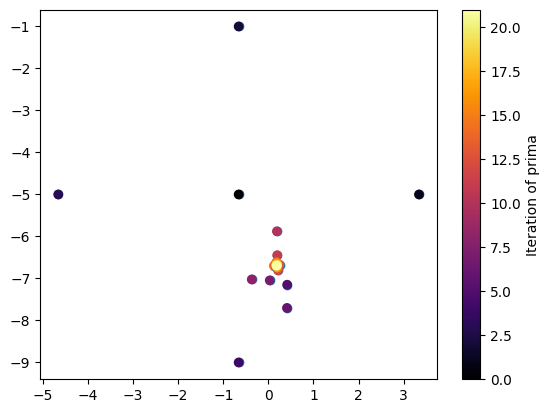

In [3]:

from matplotlib.cm import get_cmap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_file = '../data/mse.csv'

df = pd.read_csv(data_file)
# filtered_df = df[df['contrast'] == -1.0]
filtered_df = df
v_cmap = get_cmap("inferno")


plt.scatter(filtered_df['λ'], filtered_df['α'])
sc = plt.scatter(filtered_df['λ'], filtered_df['α'], c=range(len(filtered_df)), cmap=v_cmap)
plt.colorbar(sc, label='Iteration of prima')

plt.show()

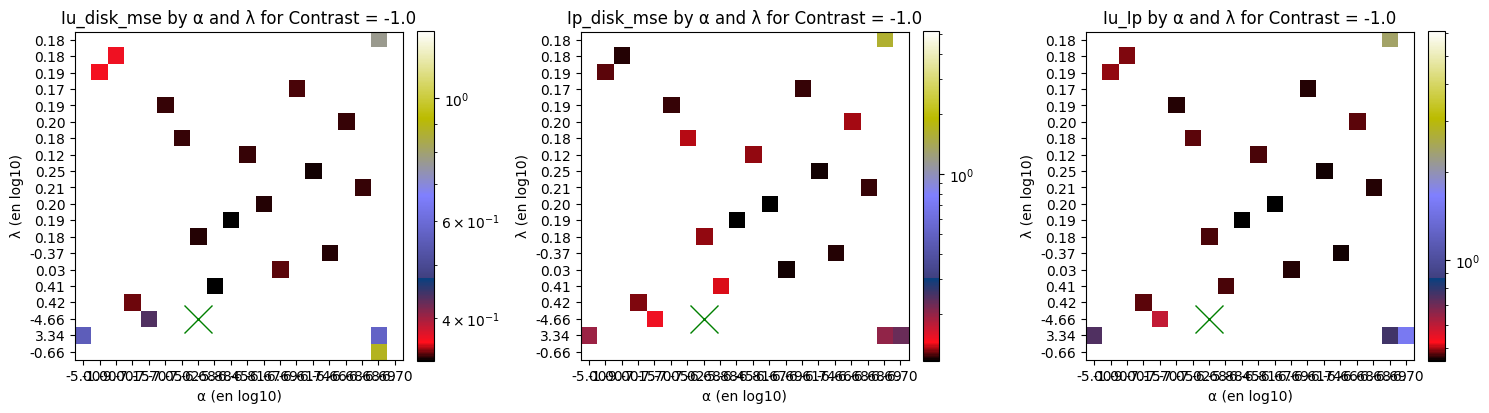

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
data_file = '../data/mse.csv'
# data_file = '../data/refined_mse_list.csv'

df = pd.read_csv(data_file)

df['λ'] = df['λ'].astype(float)
df['α'] = df['α'].astype(float)

mse_columns = ['Iu_disk_mse', 'Ip_disk_mse', 'Iu_Ip']

df_aggregated = df
df_aggregated["Iu_Ip"] = df_aggregated['Iu_disk_mse'] + df_aggregated['Ip_disk_mse']
fig, axs = plt.subplots(1, 3, figsize=(15, 12))

for i, mse in enumerate(mse_columns):
    heatmap_data = df_aggregated.pivot(index='λ', columns='α', values=mse)
    heatmap_values = heatmap_data.values.tolist()
    ax = axs[i]
    im = ax.imshow(heatmap_values, cmap='gist_stern', origin='lower', norm=colors.LogNorm())
    ax.plot(7, 2, 'xg', ms=20)
    ax.set_title(f'{mse} by α and λ for Contrast = {contrast}')
    ax.set_xlabel('α (en log10)')
    ax.set_ylabel('λ (en log10)')
    ax.set_xticks(ticks=[i for i in range(0, 20)])
    ax.set_xticklabels([f'{x:.2f}' for x in df_aggregated['α'].unique()])
    ax.set_yticks(ticks=[i for i in range(0, 20)])
    ax.set_yticklabels([f'{y:.2f}' for y in df_aggregated['λ'].unique()])
    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

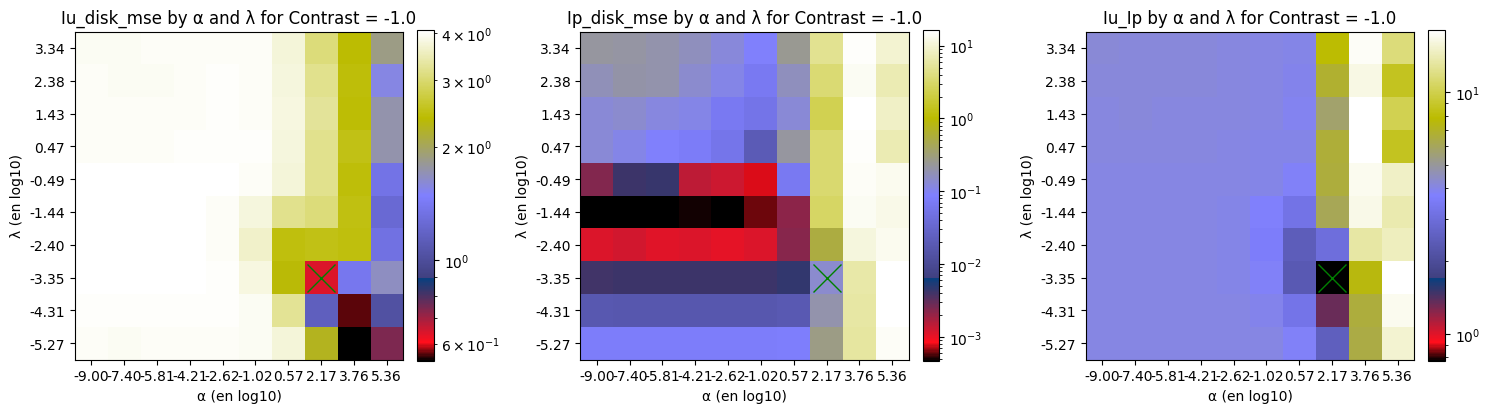

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
data_file = '../data/missing_mse_list_-1.0.csv'
# data_file = '../data/refined_mse_list.csv'

df = pd.read_csv(data_file)

df['λ'] = df['λ'].astype(float)
df['α'] = df['α'].astype(float)
df['contrast'] = df['contrast'].astype(float)

mse_columns = ['Iu_disk_mse', 'Ip_disk_mse', 'Iu_Ip']

for contrast in df['contrast'].unique():
    if contrast != -1.0:
        continue
    df_contrast = df[df['contrast'] == contrast]
    df_aggregated = df_contrast.groupby(['λ', 'α'], as_index=False).mean()
    df_aggregated["Iu_Ip"] = df_aggregated['Iu_disk_mse'] + df_aggregated['Ip_disk_mse']
    fig, axs = plt.subplots(1, 3, figsize=(15, 12))

    for i, mse in enumerate(mse_columns):
        heatmap_data = df_aggregated.pivot(index='λ', columns='α', values=mse)
        heatmap_values = heatmap_data.values.tolist()
        ax = axs[i]
        im = ax.imshow(heatmap_values, cmap='gist_stern', origin='lower', norm=colors.LogNorm())
        ax.plot(7, 2, 'xg', ms=20)
        ax.set_title(f'{mse} by α and λ for Contrast = {contrast}')
        ax.set_xlabel('α (en log10)')
        ax.set_ylabel('λ (en log10)')
        ax.set_xticks(ticks=[i for i in range(0, 10)])
        ax.set_xticklabels([f'{x:.2f}' for x in df_aggregated['α'].unique()])
        ax.set_yticks(ticks=[i for i in range(0, 10)])
        ax.set_yticklabels([f'{y:.2f}' for y in df_aggregated['λ'].unique()])
        fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    plt.tight_layout()
    plt.show()

In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [2]:
xlabels = [10**(i*0.25 - 5) for i in range(1, 129, 25)]
xticks = [i for i in range(1, 129, 25)]

In [3]:
xvalues = [10**(i * 0.25 - 5) for i in range(1, 17)]

In [4]:
def compare_methods_plot(rhapsodie_path, adir_path, d_path):
    with open(rhapsodie_path, 'r') as r_file:
        r_lines = r_file.readlines()
        r_values = [list(map(float, line.split())) for line in r_lines]
        r_values = [r_values[i * 8] for i in range(16)]

    with open(adir_path, 'r') as a_file:
        a_lines = a_file.readlines()
        a_values = [list(map(float, line.split())) for line in a_lines]
    # Transpose the values to separate columns
    a_values = np.array(a_values).T

    with open(d_path, 'r') as d_file:
        d_lines = d_file.readlines()
        d_values = [list(map(float, line.split())) for line in d_lines]
    # Transpose the values to separate columns
    d_values = np.array(d_values).T
# Iu, Ip, theta, I, Q, U
#     plt.loglog(xvalues, r_values[3], label='Iu - Rhapsodie')
    print(r_values)
    plt.loglog(xvalues, a_values[7], label='Iu_disk - ADIR')
    plt.title('RMSE for Iu over regularization parameter')
    plt.xlabel('Regularization parameter')
    plt.ylabel('RMSE')
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.loglog(xvalues, r_values, label='Ip - Rhapsodie')
    plt.loglog(xvalues, a_values[8], label='Ip - ADIR')
    plt.loglog(xvalues, [d_values[0][0] for _ in range(16)], label='Ip - Double difference')
    plt.title('RMSE for Ip over regularization parameter')
    plt.xlabel('Regularization parameter')
    plt.ylabel('RMSE')
    plt.legend()
    plt.grid(True)
    # axs[1].xticks(ticks=xticks, labels=xlabels)
    plt.show()
    # plt.plot(xvalues, [abs(r_values[5][i]) / 100595 for i in range(16)], label='theta - Rhapsodie')
    # plt.plot(xvalues, a_values[9], label='theta - ADIR')
    # plt.plot(xvalues, [abs(d_values[5][0]) for _ in range(16)], label='theta - Double difference')
    # plt.title('RMSE for Theta over regularization parameter')
    # plt.xlabel('Regularization parameter')
    # plt.ylabel('RMSE')
    # plt.legend()
    # plt.grid(True)
    # # axs[2].xticks(ticks=xticks, labels=xlabels)
    # plt.show()
    

[[463.6970029827112], [445.66171734656933], [415.4603880907602], [337.85411632565285], [229.22145179125715], [127.20733416510343], [65.99307757368913], [32.78527917973125], [16.083051017538246], [8.567339619440915], [5.355595343364519], [4.092701101054852], [4.4073570454481645], [4.585321764461217], [6.485256501393252], [5.342289297650892]]


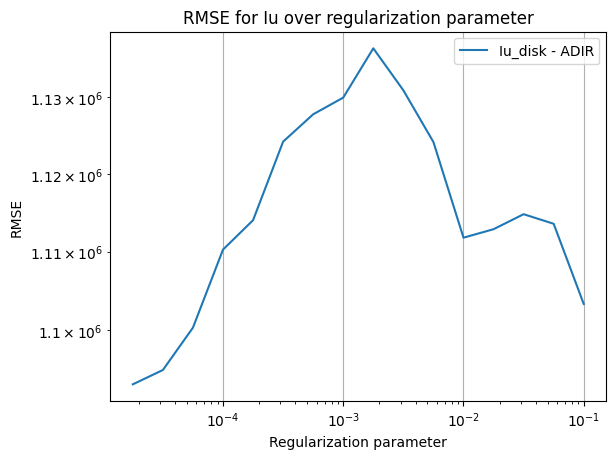

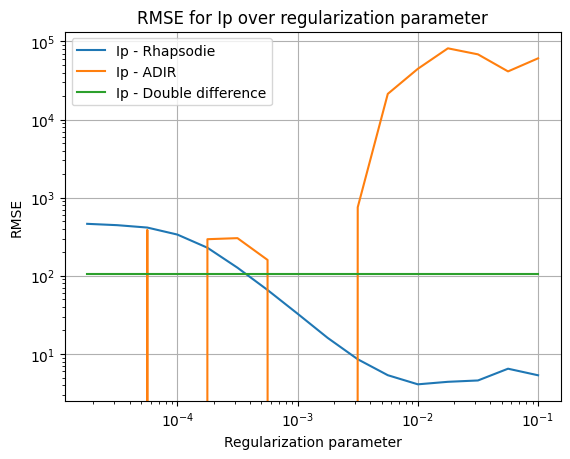

In [5]:
compare_methods_plot('../test_results/methods_comparison/mse_rhapsodie_ip_128_points.txt', '../test_results/methods_comparison/mse_list_adir.txt', '../test_results/methods_comparison/mse_doublediff_ip.txt')

In [9]:
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from matplotlib.colors import PowerNorm, SymLogNorm
    
def plot_images_comparison(ground_truth_path, adir_path, rhapsodie_path, double_diff_path):
    gt_hdulist = fits.open(ground_truth_path)
    adir_hdulist = fits.open(adir_path)
    rhapsodie_hdulist = fits.open(rhapsodie_path)
    double_diff_hdulist = fits.open(double_diff_path)
    
    gt_imgs = gt_hdulist[0].data[:10] # Itot, I_star, I_disk, Q, U, Iu, Iu_star, Iu_disk, Ip, theta
    adir_imgs = adir_hdulist[0].data[:10] # Itot, I_star, I_disk, Q, U, Iu, Iu_star, Iu_disk, Ip, theta
    rhap_imgs = rhapsodie_hdulist[0].data[:3] # Only Iu, Ip, theta
    double_diff_imgs = double_diff_hdulist[0].data[:3] # Only Iu, Ip, theta
    
    gt_hdulist.close()
    adir_hdulist.close()
    double_diff_hdulist.close()
    rhapsodie_hdulist.close()
    
    imgs = [gt_imgs, adir_imgs, rhap_imgs, double_diff_imgs]
    method_names = ['Ground truth', 'ADIR', 'Rhapsodie', 'Double difference']
    titles = ['Iu', 'Ip', 'Theta', 'Iu_disk']
    
    
    num_cols = 4
    num_rows = 3
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(9, 9))
    fig.subplots_adjust(0.1, 0.1, 0.9, 0.9, 0.1, 0.6) # Bottom, top, left, right, wspace, hspace
    for i in range(num_rows):
        if i == 0:
            norm = PowerNorm(gamma=0.5, vmin=10, vmax=7000)
            cmap = 'PuOr'
        if i == 1:
            norm = PowerNorm(gamma=0.25, vmin=0, vmax=80)
            cmap = 'gist_heat'
        if i == 2:
            norm = PowerNorm(gamma=0.25)
            cmap = 'gist_heat'
        for j in range(num_cols):
            ax = axs[i, j]
            if j == 0 or j == 1:
                img = imgs[j][i + 7]
            else:
                img = imgs[j][i]
            im = ax.imshow(img, cmap=cmap, norm=norm)
            if i == 0:
                ax.set_title(method_names[j])
            if j == 0:
                ax.set_ylabel(titles[i], rotation=0, ha='right')
            ax.set_xticks([])
            ax.set_yticks([])
        
        # Add colorbars
        cbar_ax = fig.add_axes([1, 0.68 - 0.32 * i, 0.02, 0.25])
        fig.colorbar(im, cax=cbar_ax)
        cbar_ax.tick_params(labelsize=8)
    plt.tight_layout()
    plt.show()

C:\Users\vince\AppData\Local\Temp\ipykernel_15544\1996365597.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


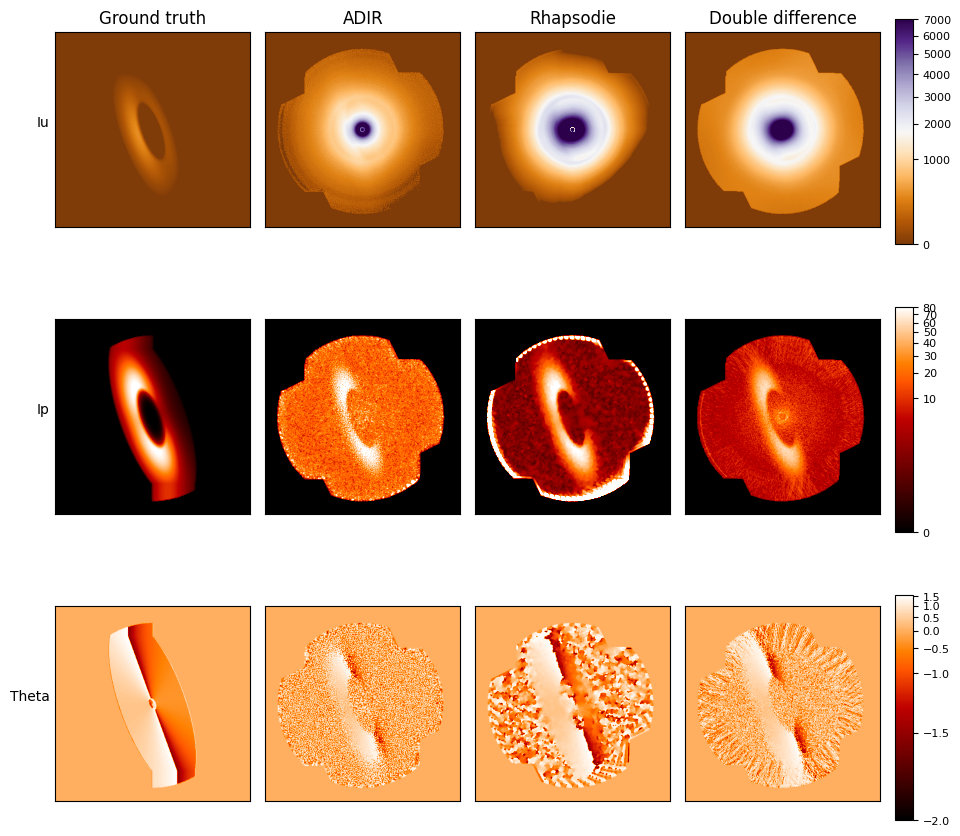

In [7]:
plot_images_comparison('../test_results/TRUE.fits', '../test_results/methods_comparison/adir.fits', '../test_results/methods_comparison/rhapsodie.fits', '../test_results/methods_comparison/double_diff.fits')

In [11]:
def plot_base_rhapsodie_from_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        values = [list(map(float, line.split())) for line in lines]
    # Transpose the values to separate columns
    values = np.array(values).T
    print(len(values))

    fig, axs = plt.subplots(3, 1, figsize=(10, 15))
    axs[0].plot(values[3], label='Iu')
    axs[0].set_title('MSE over regularization parameter')
    axs[0].set_xlabel('Regularization parameter')
    axs[0].set_ylabel('MSE')
    axs[0].legend()
    axs[0].grid(True)    

    axs[1].plot(values[4], label='Ip')
    axs[1].set_title('MSE over regularization parameter')
    axs[1].set_xlabel('Regularization parameter')
    axs[1].set_ylabel('MSE')
    axs[1].legend()
    axs[1].grid(True)
    # axs[1].xticks(ticks=xticks, labels=xlabels)

    axs[2].plot(values[5], label='theta')
    axs[2].set_title('MSE over regularization parameter')
    axs[2].set_xlabel('Regularization parameter')
    axs[2].set_ylabel('MSE')
    axs[2].legend()
    axs[2].grid(True)
    # plt.xticks(ticks=xticks, labels=[f'{x:.2e}' for x in xlabels])
    # axs[2].xticks(ticks=xticks, labels=xlabels)
    plt.tight_layout()
    plt.show()
    
def plot_MSE_from_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        values = [list(map(float, line.split())) for line in lines]
    # Transpose the values to separate columns
    values = np.array(values).T
    print(len(values))

    fig, axs = plt.subplots(3, 1, figsize=(10, 15))

    axs[0].plot(values[0], label='I_tot')
    axs[0].plot(values[6], label='I_star')
    axs[0].plot(values[7], label='Iu_disk')
    axs[0].set_title('MSE over regularization parameter')
    axs[0].set_xlabel('Regularization parameter')
    axs[0].set_ylabel('MSE')
    axs[0].legend()
    axs[0].grid(True)    

    axs[1].plot(values[3], label='Q')
    axs[1].plot(values[4], label='U')
    axs[1].plot(values[8], label='Ip')
    axs[1].set_title('MSE over regularization parameter')
    axs[1].set_xlabel('Regularization parameter')
    axs[1].set_ylabel('MSE')
    axs[1].legend()
    axs[1].grid(True)
    # axs[1].xticks(ticks=xticks, labels=xlabels)

    axs[2].plot(values[9], label='theta')
    axs[2].set_title('MSE over regularization parameter')
    axs[2].set_xlabel('Regularization parameter')
    axs[2].set_ylabel('MSE')
    axs[2].legend()
    axs[2].grid(True)
    # plt.xticks(ticks=xticks, labels=[f'{x:.2e}' for x in xlabels])
    axs[2].xticks(ticks=xticks, labels=xlabels)
    plt.tight_layout()
    plt.show()

10


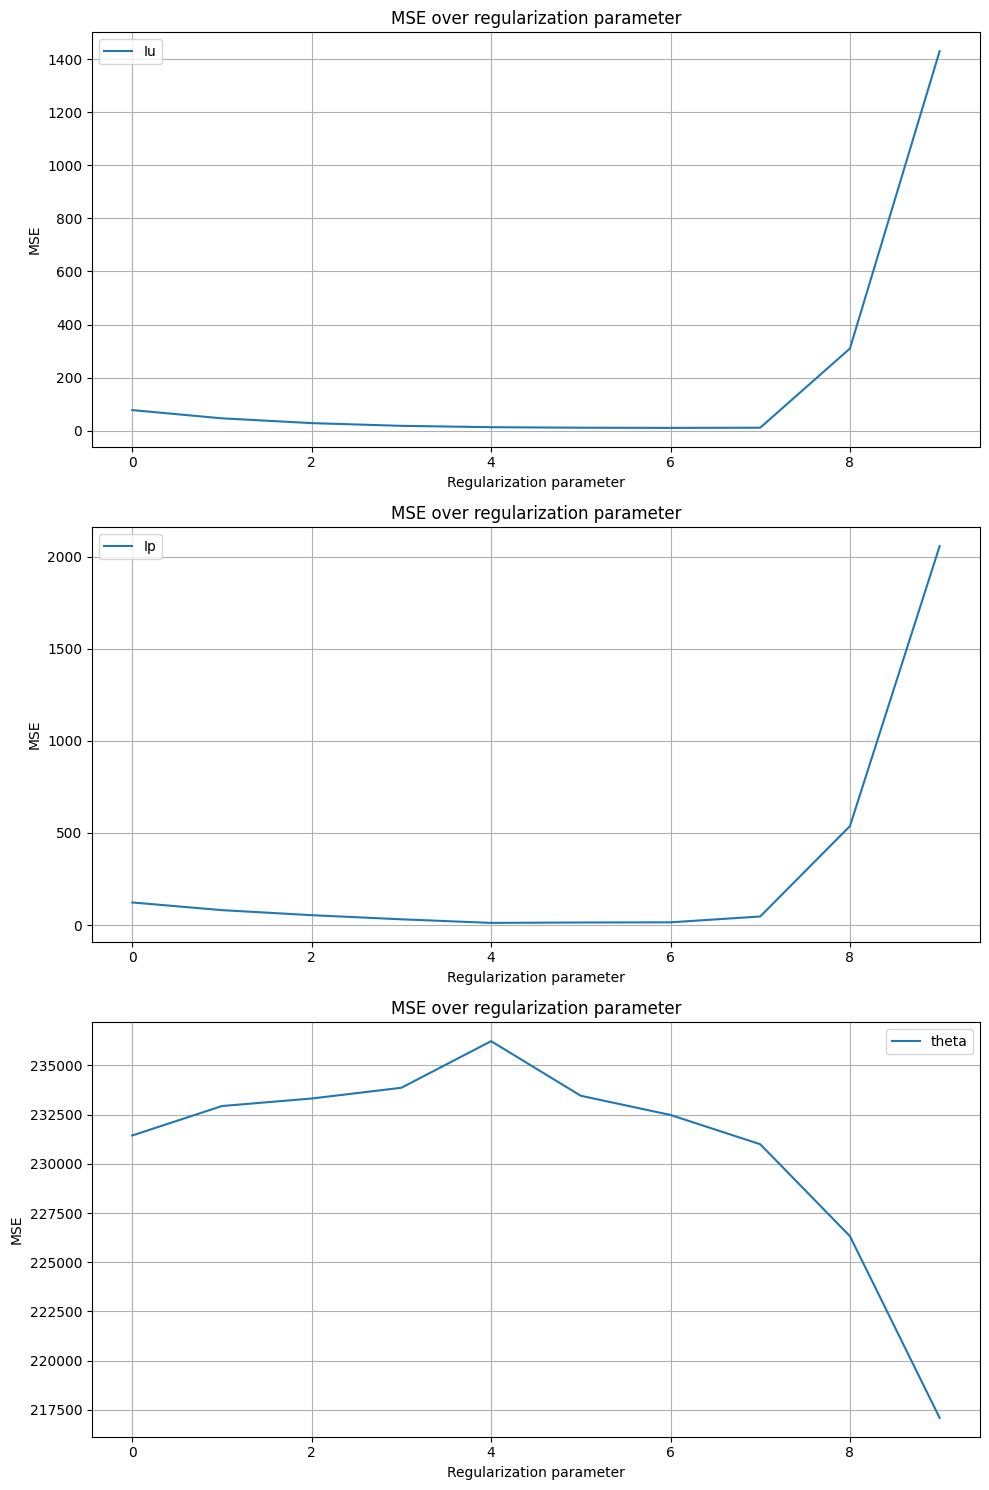

In [13]:
plot_base_rhapsodie_from_file("../test_results/rhapsodie_method_results/max_iter_700/mse_list.txt")

In [ ]:
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from matplotlib.colors import PowerNorm, SymLogNorm

titles = ['I_tot', 'I_star', 'I_disk', 'Q', 'U', 'Iu', 'Iu_star', 'Iu_disk', 'Ip', 'theta']

def compare_files(file1_path, file2_path, n_first):
    hdulist1 = fits.open(file1_path)
    hdulist2 = fits.open(file2_path)
    
    imgs1 = hdulist1[0].data[:n_first]
    imgs2 = hdulist2[0].data[:n_first]
    
    hdulist1.close()
    hdulist2.close()
    
    num_images = min(len(imgs1), len(imgs2))
    num_cols = 2
    num_rows = 4
    idx = 0
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(9, 18))
    fig.subplots_adjust(0.1, 0.1, 0.9, 0.9, 0.015, 0.3) # Bottom, top, left, right, wspace, hspace
    for i in range(num_images):
        if titles[i] in ['Q', 'U']:
            norm = SymLogNorm(1, vmin=-100, vmax=100)
            cmap = 'PuOr'
        elif titles[i] in ['Ip', 'theta']:
            norm = PowerNorm(gamma=0.25)
            cmap = 'gist_heat'
        else:
            continue
        ax = axs[idx, 1]
        ax.imshow(imgs1[i], cmap=cmap, norm=norm)
        ax.set_title(f'Over regularized - {titles[i]}')
        ax.set_xticks([])
        ax.set_yticks([])
        
        
        ax = axs[idx, 0]
        imshow = ax.imshow(imgs2[i], cmap=cmap, norm=norm)
        ax.set_title(f'Under regularized - {titles[i]}')
        ax.set_xticks([])
        ax.set_yticks([])
        plt.colorbar(imshow, format='%.0e')
        idx += 1
    
    # plt.tight_layout()
    plt.show()

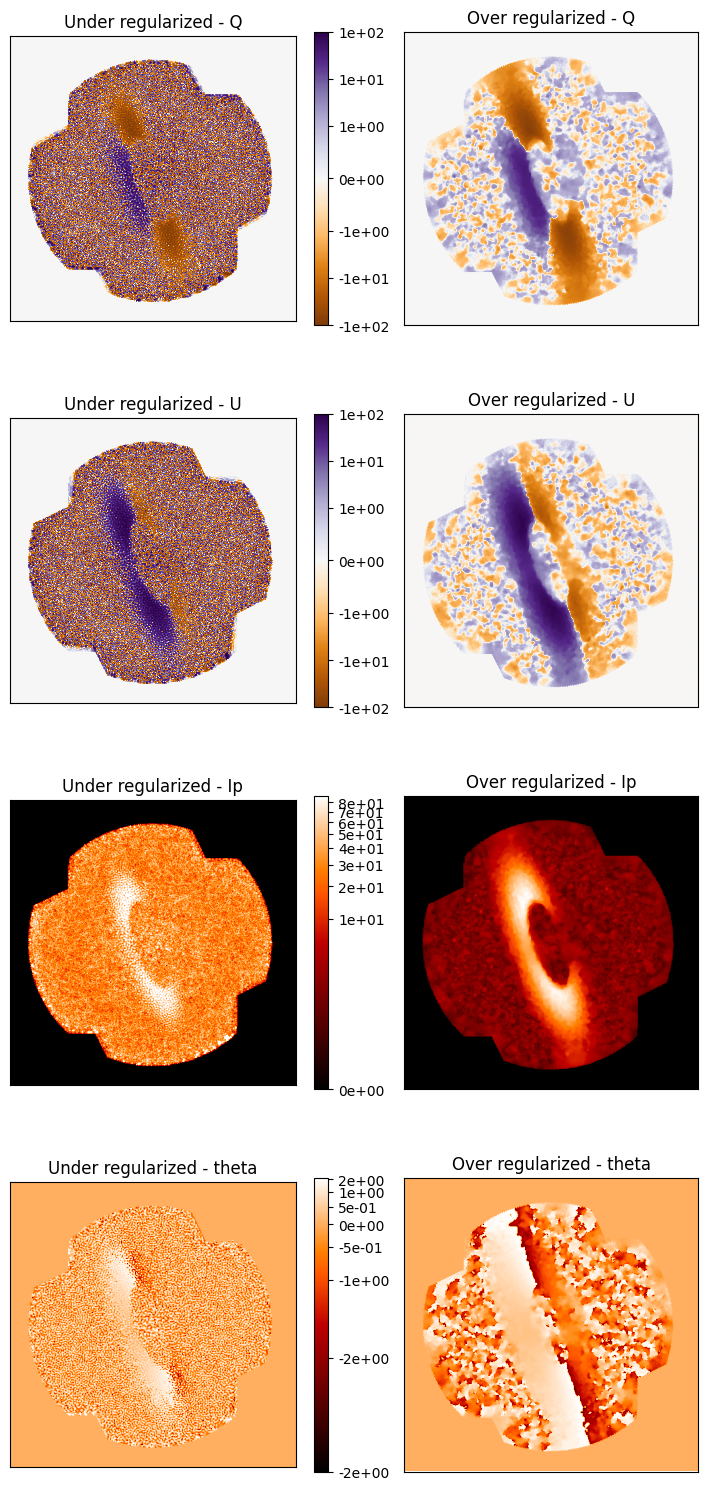

In [ ]:
compare_files("../test_results/rhapsodie_method_results/max_iter_100/RHAPSODIE_non_linear_results_regul_param_100000(over_regul).fits", "../test_results/rhapsodie_method_results/max_iter_100/RHAPSODIE_non_linear_results_regul_param_1.0e-15(under_regul).fits", 10)

In [ ]:
import astropy.io.fits as fits
import matplotlib.pyplot as plt

def plot_single_image(file_path, norm=None):
    hdulist = fits.open(file_path)
    imgs = hdulist[0].data
    hdulist.close()
    plt.imshow(imgs[0], cmap='gray', norm=norm)
    plt.title("Data Sample")
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.show()

In [22]:
def plot_fits_images(file_path, norm=None):
    titles = ['I_tot', 'I_star', 'I_disk', 'Q', 'U', 'Iu', 'Iu_star', 'Iu_disk', 'Ip', 'theta']
    hdulist = fits.open(file_path)
    imgs = hdulist[0].data
    hdulist.close()
    num_images = len(imgs)
    fig, axs = plt.subplots(1, 3, figsize=(12, 6))
    for i in range(num_images - 3, num_images):
        if titles[i] == 'Q' or titles[i] == 'U':
            norm = SymLogNorm(1, vmin=-100, vmax=100)
            cmap = 'PuOr'
        else:
            norm = PowerNorm(gamma=0.25)
            cmap = 'gist_heat'
        curr_img = imgs[i]
        ax = axs[num_images - i - 1]
        ax.imshow(curr_img, cmap=cmap, norm=norm)
        ax.set_title(titles[i])
        ax.set_xticks([])
        ax.set_yticks([])
    plt.tight_layout()
    plt.show()

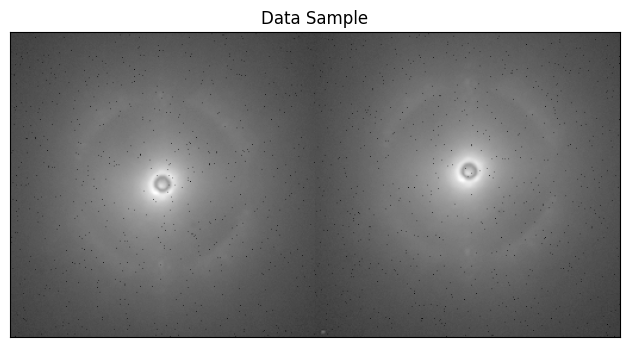

In [ ]:
plot_single_image("../test_results/DATA.fits", norm=PowerNorm(gamma=0.25))

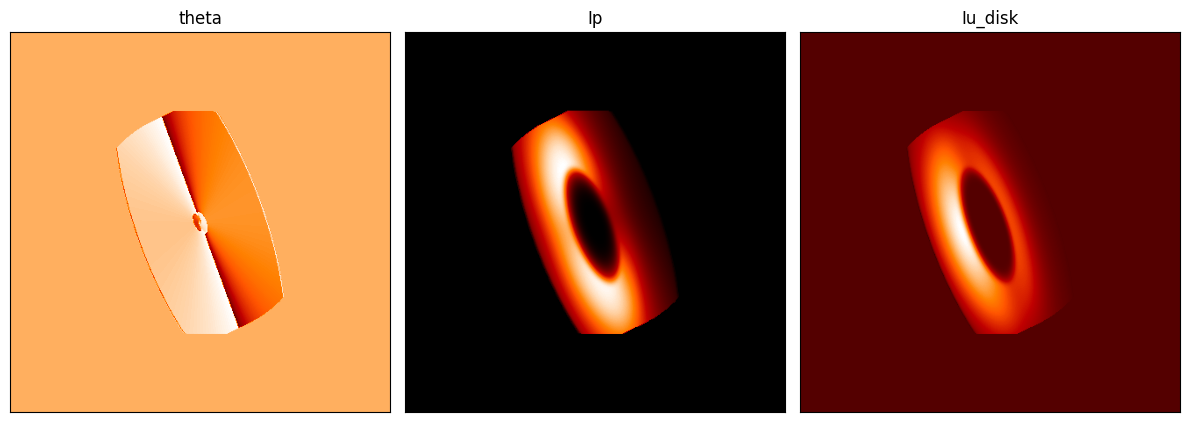

In [27]:
plot_fits_images("../test_results/contrast_10e-3.0/TRUE.fits", norm=PowerNorm(gamma=0.25))

In [6]:
print(df.head())  # Check the first few rows of the DataFrame
print(df.shape)   # Check the shape of the DataFrame
print(data.shape) # Check the shape of the NumPy array


                                                   0
0  152099.21105192622\t1.206754695484423e6\t2.137...
1  152239.38412378763\t1.2041225129292884e6\t2.13...
2  150976.517931067\t1.184537109722742e6\t2.10410...
3  148114.8813235909\t1.1389750218464273e6\t2.035...
4  142969.46912664926\t1.0078458641836459e6\t1.84...
(7, 1)
(7, 1)


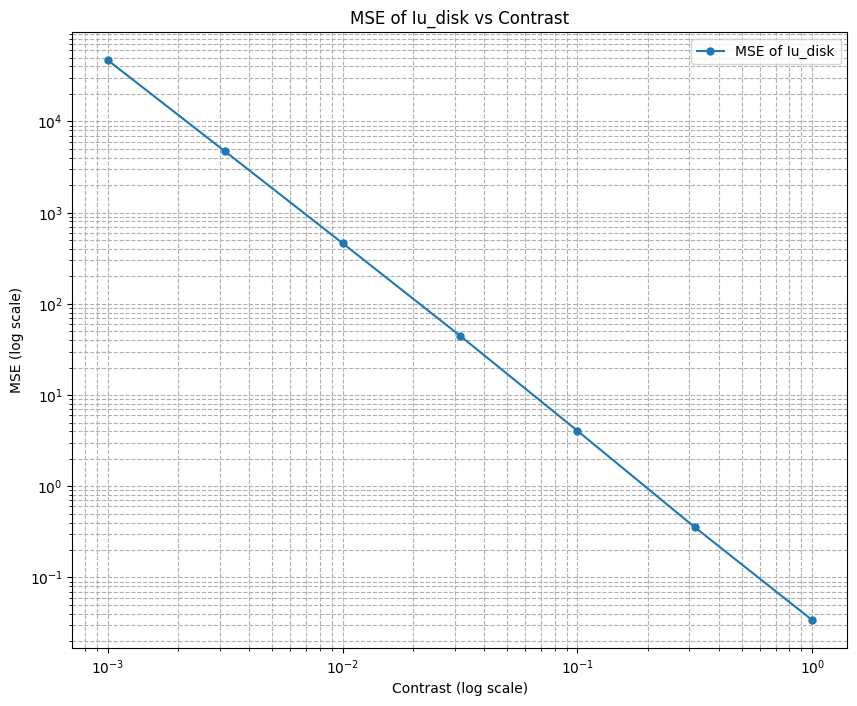

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load the CSV file
filename = '../test_results/mse_list.txt'  # replace with your CSV file path
df = pd.read_csv(filename, delimiter='\t', header=None)

# Ensure data is in NumPy array form
data = df.to_numpy()

# Define the contrast range (from 1e-3 to 1e0 with 0.5 steps in logspace)
contrast = np.logspace(-3, 0, num=data.shape[0])

# Assuming the columns follow the given order:
columns = ['I', 'I_star', 'I_disk', 'Q', 'U', 'Iu', 'Iu_star', 'Iu_disk', 'Ip', 'Theta']

# Plotting function with improvements
def plot_mse_improved(contrast, data, columns):
    plt.figure(figsize=(10, 8))
    # Plot all variables on the same figure
    for i, col in enumerate(columns):
        if col not in ['Iu_disk']:
            continue
        plt.plot(contrast, data[:, i], label=f'MSE of {col}', marker='o', linestyle='-', markersize=5)

    # Setting logarithmic scales
    plt.xscale('log')
    plt.yscale('log')

    # Labels and title
    plt.xlabel('Contrast (log scale)')
    plt.ylabel('MSE (log scale)')
    plt.title('MSE of Iu_disk vs Contrast')
    plt.grid(True, which='both', ls='--')

    # Show legend
    plt.legend(loc='best')

    # Show the plot
    plt.show()

# Call the plotting function
plot_mse_improved(contrast, data, columns)